In [1]:
import pandas as pd
import numpy as np

# Train data 

In [7]:
train_data=pd.read_csv("https://raw.githubusercontent.com/Vsekar05/Datasets/main/trainKNN.txt",sep=",",header=None,
                       names=["oxide1","oxide2","oxide3","oxide4","oxide5","oxide6","oxide7","oxide8","oxide9","oxide10","oxide11"])
train_data

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oxide1   196 non-null    int64  
 1   oxide2   196 non-null    float64
 2   oxide3   196 non-null    float64
 3   oxide4   196 non-null    float64
 4   oxide5   196 non-null    float64
 5   oxide6   196 non-null    float64
 6   oxide7   196 non-null    float64
 7   oxide8   196 non-null    float64
 8   oxide9   196 non-null    float64
 9   oxide10  196 non-null    float64
 10  oxide11  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [9]:
train_data.isna().sum()

oxide1     0
oxide2     0
oxide3     0
oxide4     0
oxide5     0
oxide6     0
oxide7     0
oxide8     0
oxide9     0
oxide10    0
oxide11    0
dtype: int64

In [10]:
train_data.isnull().sum()

oxide1     0
oxide2     0
oxide3     0
oxide4     0
oxide5     0
oxide6     0
oxide7     0
oxide8     0
oxide9     0
oxide10    0
oxide11    0
dtype: int64

In [11]:
train_data.describe()

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


# Test data

In [12]:
test_data=pd.read_csv("https://raw.githubusercontent.com/Vsekar05/Datasets/main/testKNN.txt",sep=",",header=None,
                       names=["oxide1","oxide2","oxide3","oxide4","oxide5","oxide6","oxide7","oxide8","oxide9","oxide10","oxide11"])
test_data

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oxide1   18 non-null     int64  
 1   oxide2   18 non-null     float64
 2   oxide3   18 non-null     float64
 3   oxide4   18 non-null     float64
 4   oxide5   18 non-null     float64
 5   oxide6   18 non-null     float64
 6   oxide7   18 non-null     float64
 7   oxide8   18 non-null     float64
 8   oxide9   18 non-null     float64
 9   oxide10  18 non-null     float64
 10  oxide11  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB


In [14]:
test_data.isna().sum()

oxide1     0
oxide2     0
oxide3     0
oxide4     0
oxide5     0
oxide6     0
oxide7     0
oxide8     0
oxide9     0
oxide10    0
oxide11    0
dtype: int64

In [15]:
test_data.isnull().sum()

oxide1     0
oxide2     0
oxide3     0
oxide4     0
oxide5     0
oxide6     0
oxide7     0
oxide8     0
oxide9     0
oxide10    0
oxide11    0
dtype: int64

In [16]:
test_data.describe()

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


# Exploratary Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



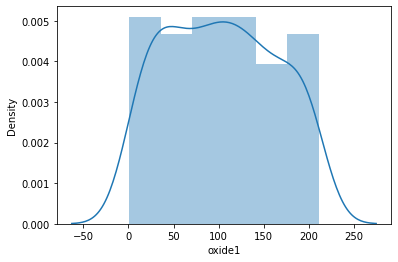

In [20]:
sns.distplot(train_data["oxide1"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



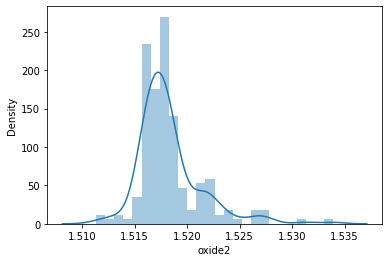

In [21]:
sns.distplot(train_data["oxide2"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



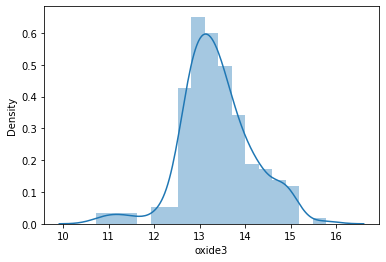

In [22]:
sns.distplot(train_data["oxide3"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



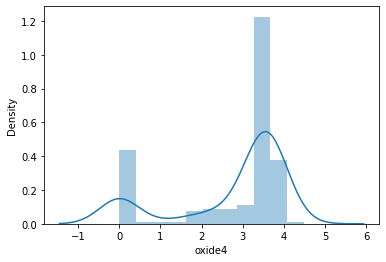

In [25]:
sns.distplot(train_data["oxide4"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



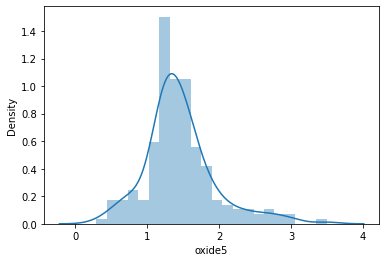

In [26]:
sns.distplot(train_data["oxide5"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



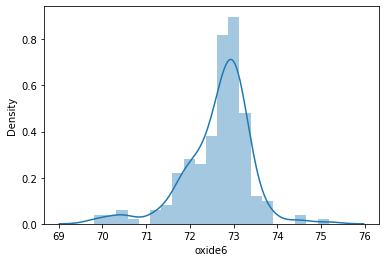

In [27]:
sns.distplot(train_data["oxide6"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



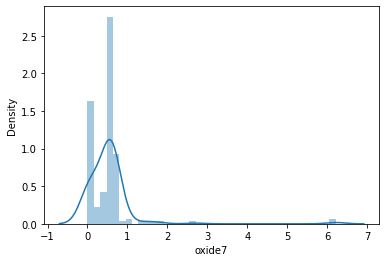

In [28]:
sns.distplot(train_data["oxide7"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



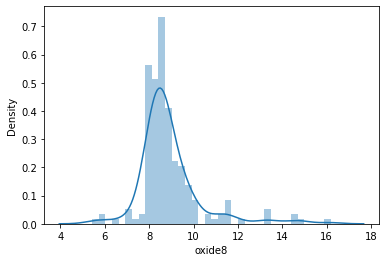

In [29]:
sns.distplot(train_data["oxide8"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



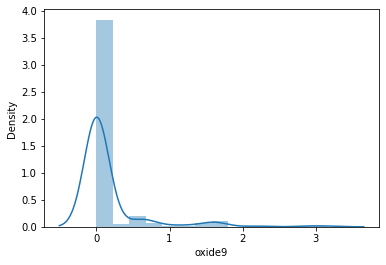

In [32]:
sns.distplot(train_data["oxide9"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



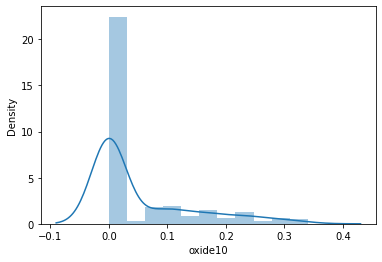

In [33]:
sns.distplot(train_data["oxide10"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



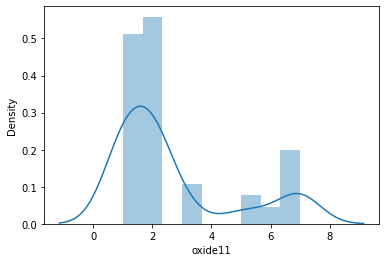

In [34]:
sns.distplot(train_data["oxide11"])
plt.show()

# KNN Euclidean Distance

In [38]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsClassifier

In [41]:
X_train=train_data.drop(columns=["oxide11"])
y_train=train_data["oxide11"]
X_test=test_data.drop(columns=["oxide11"])
y_test=test_data["oxide11"]

In [42]:
model = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [43]:
yhat=model.predict(X_test)
yhat

array([1, 1, 2, 2, 2, 3, 3, 3, 3, 5, 6, 6, 6, 6, 6, 7, 7, 7])

In [44]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9948979591836735
Test set Accuracy:  0.7777777777777778


In [45]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))

Train set Accuracy:  0.9948979591836735


In [46]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Test set Accuracy:  0.7777777777777778


In [47]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
mean_acc

array([0.77777778, 0.83333333, 0.77777778, 0.77777778, 0.66666667,
       0.77777778, 0.66666667, 0.77777778, 0.61111111])

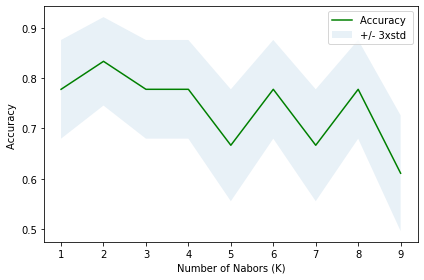

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [49]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8333333333333334 with k= 2


The best score calculated with this data is 83.33% for Euclidean distance

# KNN Manhattan Distance

In [50]:
X_train=train_data.drop(columns=["oxide11"])
y_train=train_data["oxide11"]
X_test=test_data.drop(columns=["oxide11"])
y_test=test_data["oxide11"]

In [52]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [57]:
csr_data = csr_matrix(train_data.values)

In [58]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [59]:
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [67]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


The accuracy score for the manhattan distance with the data is 73.33%